### Feature visualization (PyTorch)

This is an example of feature visualization with a Tensorflow model. The feature visualization in OmniXAI is an optimization-based method, allowing to set different objectives, e.g., layer, channel, neuron or direction. For more information, please visit https://distill.pub/2017/feature-visualization/

In [4]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [5]:
import torch
import sys
import os
from torchvision import models
sys.path.append(os.path.abspath('/omnixai/explainers/vision/specific/feature_visualization/visualizer'))
from omnixai.explainers.vision.specific.feature_visualization.visualizer import FeatureVisualizer

Here we choose the VGG16 model for demonstration (you may test other CNN models, e.g., ResNet). The target layer is the layer to analyze.

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.vgg16(weights=True).to(device)
target_layer = model.features[26]
print(len(model.features))

/Users/thewelcomer/Coding/CV-IS-Fall-2024/OmniXAI/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.



31


The first example is the "layer" objective, where we optimize the input image such that the average output of the layer is maximized.

Step: 100 |████████████████████████████████████████| 100.0% 


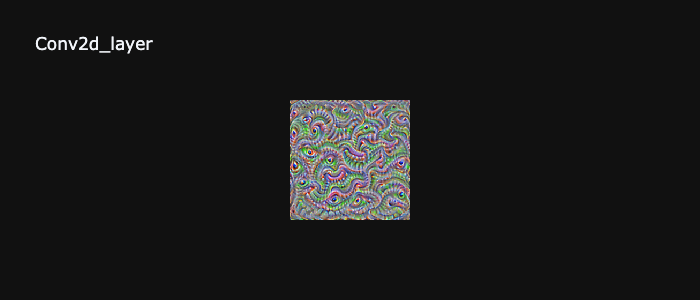

In [8]:
optimizer = FeatureVisualizer(
    model=model,
    objectives=[{"layer": target_layer, "type": "layer", "index": list(range(12))}]
)
explanations = optimizer.explain(
    num_iterations=100,
    image_shape=(224, 224)
)
explanations.ipython_plot()

The second example is the "channel" objective, where the input image is optimized such that the output of the specified channel is maximized.

Step: 1000 |████████████████████████████████████████| 100.0% 


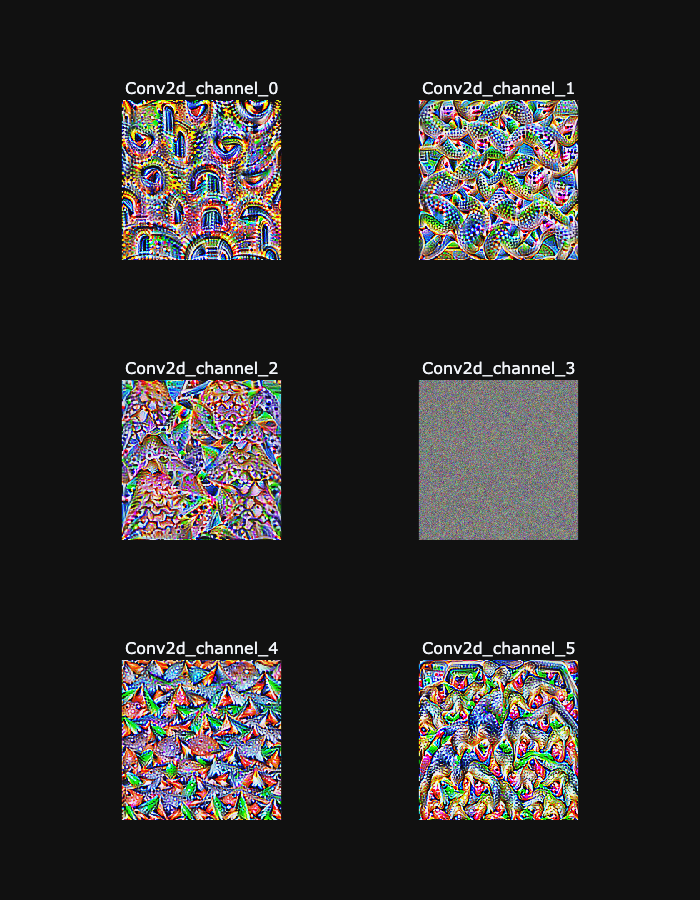

In [13]:
for i in range(26, 27):
    optimizer = FeatureVisualizer(
        model=model,
        objectives=[{"layer": model.features[i], "type": "channel", "index": list(range(6))}]
    )
    explanations = optimizer.explain(
        num_iterations=1000,
        image_shape=(224, 224)
    )
    explanations.ipython_plot()

We can also consider a combination of multiple objectives. The default weight for each objective is 1.0. We can set other weights as well.

In [1]:
optimizer = FeatureVisualizer(
    model=model,
    objectives=[
        {"layer": target_layer, "type": "layer", "weight": 0.1},
        {"layer": target_layer, "type": "channel", "index": list(range(4))}
    ]
)
explanations = optimizer.explain(
    num_iterations=1000,
    image_shape=(224, 224)
)
explanations.ipython_plot()

NameError: name 'FeatureVisualizer' is not defined

Let's try another target layer and use FFT preconditioning:

Step: 300 |████████████████████████████████████████| 100.0% 


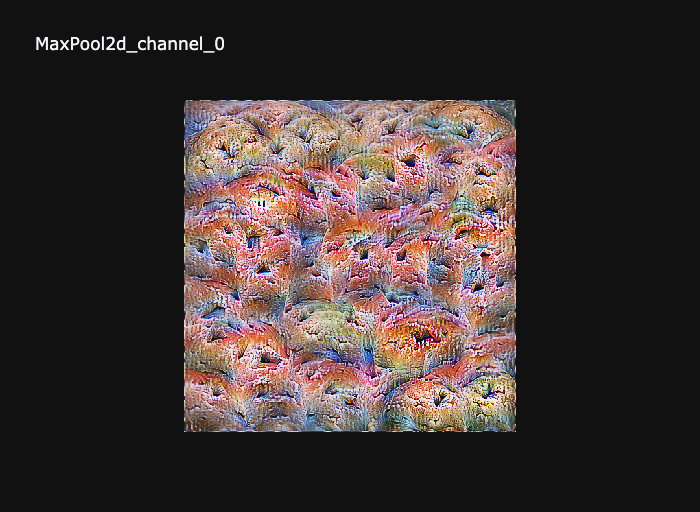

In [71]:
target_layer = model.features[-1]
optimizer = FeatureVisualizer(
    model=model,
    objectives=[
        {"layer": target_layer, "type": "channel", "index": list(range(1))}
    ]
)
explanations = optimizer.explain(
    num_iterations=300,
    image_shape=(512, 512),
    use_fft=True
)
explanations.ipython_plot()